<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Валерия, рад приветствовать ВАС! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху Ваших знаний - свой опыт, что бы Вы могли использовать его для Вашего дальнейшего успеха)
<br>
</font>
<br>

</font>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки pandas, matplotlib и seaborn - они понадобятся нам для построения графиков в дальнейшем. Настроим отображение графиков, их формат и дефолтный размер. 
<br><br>
Изучим общую информацию с помощью **метода info()**. Распечатаем первые строки таблицы с помощью **метода head()**. 

In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

data = pd.read_csv('/datasets/real_estate_data.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB
None
  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                         

Из полученной информации мы видим, что загруженный файл имеет **отличные от стандартных разделители** столбцов, поэтому данные прочитаны не верно. Вся информация записалась в один столбец через \t. Нам нужно разбить данные по столбцам, чтобы проанализировать общие сведения. 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Разобьем выводы:
<ol>
    <li>Типы данных. С целыми числами работать удобнее, они занимают меньше памяти, многие столбцы не нуждаются в дробных частях. Изменим типы данных для следующих столбцов:</li> 
    <ul>
        <li> нам вряд ли важны копейки в ценах квартир в столбце last_price - нужно перевести столбец в формат int;</li>
        <li> столбец first_day_exposition надо перевести в формат даты и времени;</li> 
        <li> столбец floors_total нужно перевести в формат int;</li>
        <li> столбец floor нужно перевести в формат int;</li>
        <li> столбец is_apatment нужно перевести в формат bool;</li>
        <li> столбец balcony нужно перевести в формат int;</li>
        <li> столбец airports_nearest нужно перевести в формат int;</li>
        <li> столбец cityCenters_nearest нужно перевести в формат int;</li>
        <li> столбец parks_around3000 нужно перевести в формат int;</li>
        <li> столбец parks_nearest нужно перевести в формат int;</li>
        <li> столбец ponds_around3000 нужно перевести в формат int;</li>
        <li> столбец ponds_nearest нужно перевести в формат int;</li>
        <li> столбец days_exposition нужно перевести в формат int.</li>
    </ul>
    <br>
    <li>Названия столбцов:</li>
    <ul>
        <li> столбец cityCenters_nearest нужно переименовать в city_centers_nearest (по общему формату названий столбцов).</li>
    </ul>
    <br>
    <li>Пропущенные значения есть в столбцах:</li>
    <ul>
        <li>ceiling_height</li>
        <li>floors_total</li>
        <li>living_area</li>
        <li>is_apartment</li>
        <li>kitchen_area</li>
        <li>balcony</li>
        <li>locality_name</li>
        <li>airports_nearest</li>
        <li>cityCenters_nearest</li>
        <li>parks_around3000</li>
        <li>parks_nearest</li>
        <li>ponds_around3000</li>
        <li>ponds_nearest</li>
        <li>days_exposition</li>
    </ul>
</ol>

Необходимо предобработать данные по списку. 
<br>
После обработки пропущенных значений и изменения типов данных необходимо проверить данные на наличие дубликатов. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Мощное аналитическое начало)
<br>
</font>

### Шаг 2. Предобработка данных

### Переименование столбцов 

Переименуем столбец **cityCenters_nearest** в city_centers_nearest. Я выбрала **метод rename()** за возможность обращения к одному столбцу, вместо перечисления всего списка столбцов методом data.columns = [].

In [3]:
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Переименование столбца прошло успешно. Теперь названия всех столбцов представлены в одном формате. 

### Обработка пропущенных значений

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'>
Небольшое вступление к теме пропущенные данные:<br>
(Это исключительно на обсуждение)<br><br>
1) Наверняка будут предложения заменить данные медианой:<br>
С медианами - верная идея. суммарно, это меньшая ошибка (ведь когда подставляем какие-то значения, то всегда тем самым сами уже вносим искажения в результат)<br>
Но есть один случай, медиана однозначно наврёт. Это когда в данных есть тренд<br>
Это больше подходит к временным рядам, но и сейчас уже можно намотать на ус))<br><br>
 2) Будут предложения по работе с выбросами.<br>
 Это важная история - очиститься от "вычурных" данных. <br>
Иногда, правда, случается, что совокупность выбросов образует некий свой кластер данных<br>
Аналитика которого также может быть ценнейшим материалом<br><br>
 3) Ну и ещё одно<br>
 А вообще, всегда ли надо бороться с пропусками?<br>
Тут критерий - здравый смысл, относительно конечной бизнес-задачи.<br>
Например, есть пропуски в данных, но не понятно чем их заполнить.<br> И если удалить пропущенные строки, то
может удалить ценная инфо по другим столбцам.<br>

<br>
</font>

Продублирую список столбцов с пропущенными значениями. Разберемся подробнее с каждым из них:
<ul>
    <li>ceiling_height - высота потолков</li>
    <li>floors_total - всего этажей в доме</li>
    <li>living_area - жилая площадь</li>
    <li>is_apartment - апартаменты (да/нет)</li>
    <li>kitchen_area - площадь кухни</li>
    <li>balcony - число балконов</li>
    <li>locality_name - название населенного пункта</li>
    <li>airports_nearest - расстояние до ближайшего аэропорта</li>
    <li>city_centers_nearest - расстояние до центра города</li>
    <li>parks_around3000 - число парков в радиусе 3км</li>
    <li>parks_nearest - расстояние до ближайшего парка</li>
    <li>ponds_around3000 - число водоемов в радиусе 3км</li>
    <li>ponds_nearest - расстояние до ближайшего водоема</li>
    <li>days_exposition - дни от публикации до снятия</li>
</ul>

Начнем с тех значений, которые можно заменить очевидно. 
Например, если пользователь не указал число **балконов**, вероятнее всего, их нет. Заменим пропущенные значения в этом столбце **на нули**.


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'>
На обсуждение<br>
иногда, некоторые специалисты могут предложить другую предпосылку:<br>
говорят так: Люди просто забыли проставить в анкетах, проставим пропуски, проанализировав данные на предмет "номер этажа - есть балкон/нет балкона" и если вероятность наличия балкона на каком-либо этаже - высока, то и основную выборку маркировали "1"<br>
Это пример того, как изначальная предпосылка может менять весь анализ)))<br><br>
предпосылка - это то, на что опирается аналитик при выборе того или иного решения<br><br>
Можно сказать, перефразирую чьи-то известные слова "А главный тут - аналитик"))<br>
А, если главный, то и ответственность несёт большую))
<br>
</font>

In [4]:
data['balcony'] = data['balcony'].fillna(0)

Значения **locality_name** заменим **на нетипичные ("0")**, потому что, при определении района по близости к аэропорту или водоемам, мы можем получать два расположенных в противоположных концах района на одинаковом расстоянии от аэрпорта и с похожим количеством водоемов. Таких пропущенных значений всего 49, поэтому они не повлияют на общую статистику. 
<br><br>
Пропущенные значения в **days_exposition** можно **заменить на нетипичные (-1)**, потому что это значение количества дней от дня публикации объявления до дня снятия объявления, его пропуск можно считать знаком того, что объявление еще не снято - продажа квартиры еще идет. 

In [5]:
data['locality_name'] = data['locality_name'].fillna('0').astype('object')

In [6]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

Все значения столбца **is_apartment** я предлагаю заменить **на False**, потому что выбор значения для таких столбцов (булевых) происходит через проставление галочки: если человек не поставил никакую галочку, это означает, что это утверждение для него неверно. *(Уточнене- этот столбец сейчас имеет тип object, но его тип мы в дальнейшем заменим на bool)*

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Мы заменили пропущенные значения в столбце is_apartment. Изменился так же и тип столбца. 
<br><br>
Обратимся к столбцу **ceiling_height** - проверим диапазон значений этого столбца, найдем среднее и медиану. Определим, насколько сильно отличается высота потолков от квартиры к квартире, и можем ли мы заменить пропущенные значения этого столбца на среднее. Для этого вызовем метод **describe()**.

In [8]:
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Мы видим, что медианное и среднее значение не сильно отличаются. **Заменим** пропущенные значения **на медианные**. 
<br><br>
Также стоит обратить внимание на нестандартные min и max значения. Минимальное значение равно 1, что невозможно, если это не домик для гномиков. Значение 100 тоже выбивается из нашей реальности. Запомним это и будем использовать позже. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Гномы и гоблины)))
<br>
</font>

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Рассмотрим столбец **floors_total** - пропущенных значений в этом столбце не так много (86). Заполнять значения по средним по району или каким-либо еще способом некорректно. Я предлагаю заменить такие значения **на "-1"**, и отбросить их при дальнейшем анализе. 

In [10]:
data['floors_total'] = data['floors_total'].fillna(-1)

Мы замениили пропущенные значения в столбце floors_total. 
<br><br>
Обратимся к столбцам **airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**. Все эти столбцы связаны с географическим положением квартиры. Их можно смело заменять **на медианные значения** по району. 
<br><br>
Напишем функцию, которая будет принимать значение столбца living_area и возвращать медианное значение нужного столбца по этому району. Применим функцию ко всем нашим столбцам. 

In [11]:
def median_for_local(data, series):
    local = data['locality_name'].unique()
    for element in local:
        median = data.query('locality_name == @element')[series].median()
        data.loc[data['locality_name'] == element, series] = data.loc[data['locality_name'] == element, series].fillna(median)

median_for_local(data, 'airports_nearest') 
median_for_local(data, 'city_centers_nearest') 
median_for_local(data, 'parks_around3000')
median_for_local(data, 'parks_nearest')
median_for_local(data, 'ponds_around3000')
median_for_local(data, 'ponds_nearest')
print(data.info())


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18313 non-null float64
city_centers_nearest    18313 non-null float64
parks_around3000        18313 non-null float64
parks_nearest           17701 non-null float64
ponds_around300

Мы заменили пропущенные значения для тех объявлений, которые находятся в районах, где у других квартир указана нужная нам инфморация. Но остались районы с пропущенными значениями. Заменим их **на "-1"** и будем отбрасывать при анализе. 
<br><br>
*Система отдает комментарий о том, что мы можем использовать метод nanmean() для вычисления среднего без учета пропущенных значений, но мы не можем использовать этот метод, потому что он применяется только к массиву и не работает с объектами типа series.*


In [12]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-1)
data['parks_around3000'] = data['parks_around3000'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_around3000'] = data['ponds_around3000'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

Таким образом, все пропущенные значения в этих столбцах заполнены. 
<br><br>
У нас остались столбцы living_area и kitchen_area. Для **living_area** напишем функцию, которая будет принимать на вход количество комнат, а на выходе отдавать **медианную площадь**. 

In [13]:
def median_living_area(data):
        rooms = data['rooms'].unique()
        for element in rooms: 
            median = data.query('rooms == @element')['living_area'].median()
            data.loc[data['rooms'] == element, 'living_area'] = data.loc[data['rooms'] == element, 'living_area'].fillna(median)

median_living_area(data)

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Как вариант, очень даже себе подход, всё зависит от графика ниже)
<br>
</font>

Чтобы определиться, каким образом заполнять пропуски в столбце **kitchen_area**, выведем график зависимости площади кухни от количества комнат. 

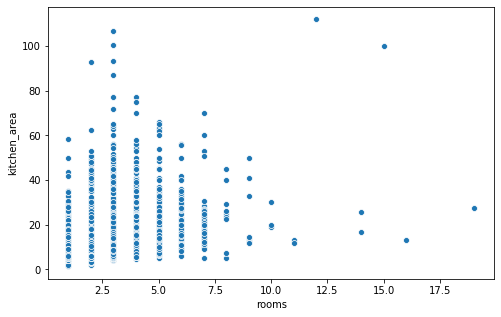

In [14]:
sns.scatterplot(x='rooms', y='kitchen_area', data=data);

За исключением отдельных выбросов, сильной зависимости площади кухни от количества комнат нет. Заменим значения размера кухни на общее медианное. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ОК, вывод из графика - верный. Зависимости скорее нет.<br><font color='red'>
Но есть разброс большой, тем самым, в данном случае, к чему приведёт замена медианой?:<br>
Рассмотрим на примере однушки: разброс от 0 (это наверное студии) до 60. Медиана, примерно около 20.<br>
Видно, что возможные ошибки от замены - достаточно велики могут быть<br>
(Такой же вывод можно сделать и по другим комнатам, за исключением 11-комнатной)))))<br><br>
Подходы ещё может быть такие (их всегда можно придумать несколько):БикЮ
1)посмотреть зависимость площади кухни от площади квартиры<br>
Но есть подозрения, что ситуация будет такая же (т.к. кол-во комнат от площади зависят сильно)<br>
2) Найти отношение площади и кухни, исходя из кол-ва комнат. И тогда вставлять в пропуски значения с учётом этого коэффициента<br> В этом случае, возможная ошибка будет меньше первого варианта
3) Вообще ничего не ставить. А почему нет? Дело в том, что всему мера - здравый смысл и возможная ошибка в будущем<br>
В этом варианте вообще мы не ошибёмся))) однако и данных будет меньше<br><br>
И вот тут - воля аналитика и целевая задача.<br>
Если нам надо построить прогнозную модель цены от параметров квартиры  (среди которых площадь кухни), <br>
и данных нам хватает - то, сорее всего, не нужно ничего подставлять, лучше оставить как есть.<br>
Саму модель мы построим, а при её использовании система будет запрашивать площадь у заказчика.<br>
Если данных мало, то можно попробовать вариант 2, но избирательно по квартирам. И с учётом дополнительного анализа каждого типа квартир - там есть нулевые кухни. Это ил описка, или студии....
    
<br>
</font>

In [15]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

Таким образом, мы избавились от всех пропущенных значений в столбцах.
<br><br>
Перейдем к изменению типов данных. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Очень здорово вышло у Вас сделать эту часть задания.<br>
логично, последовательно, понятно.<br><font color='red'>
напомню только про то, что в реальных бизннес-задачах очень важна предпосылка, <br>
 на которой аналитик будет строить свои расчёты.)))
Например то, что писал про площадь кухни, про балконы...
<br>
</font>

### Изменение типов данных 

Продублирую список столбцов, нуждающихся в изменениях:
<ul>
        <li> нам вряд ли важны копейки в ценах квартир в столбце last_price - нужно перевести столбец в формат int;</li>
        <li> столбец first_day_exposition надо перевести в формат даты и времени;</li> 
        <li> столбец floors_total нужно перевести в формат int;</li>
        <li> столбец floor нужно перевести в формат int;</li>
        <li> столбец is_apatment нужно перевести в формат bool;</li>
        <li> столбец balcony нужно перевести в формат int;</li>
        <li> столбец airports_nearest нужно перевести в формат int;</li>
        <li> столбец city_сenters_nearest нужно перевести в формат int;</li>
        <li> столбец parks_around3000 нужно перевести в формат int;</li>
        <li> столбец parks_nearest нужно перевести в формат int;</li>
        <li> столбец ponds_around3000 нужно перевести в формат int;</li>
        <li> столбец ponds_nearest нужно перевести в формат int;</li>
        <li> столбец days_exposition нужно перевести в формат int.</li>
    </ul>

В столбце is_apartment тип данных изменился при заполнении пропущенных значений. Изменим типы в нужных столбцах **на int**. 

In [16]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
city_centers_nearest    23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        23699

Осталось изменить тип данных столбца **first_day_exposition** с object **на date_time**. Посмотрим еще раз на текущий формат вывода. 

In [17]:
print(data['first_day_exposition'].head())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Проверим еще раз результаты изменений типов данных. 

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
city_centers_nearest    23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

Теперь все типы данных соответствуют нужным. Осталось проверить таблицу на наличие дубликатов. 

### Обработка дубликатов

Проверим таблицу на наличие дубликатов. 

In [20]:
print(data.duplicated().sum())

0


Полных дубликатов не обнаружено. Проверим категориальные переменные на наличие дубликатов. К категориальным переменным у нас относится только locality_name.

In [21]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

При беглом просмотре данных можно увидеть, что в некоторых случаях написано "посЕлок", а в некоторых "посЁлок", что создает дубликаты. Например, поселок Возрождение встречается в списке дважды с разным написанием. Попробуем удалить категории населенных пунктов и оставить только названия. 

In [22]:
def local_name(row):
    for id, item in enumerate(row):
        if item.isupper():
            return row[id:]
        
data['locality_name'] = data['locality_name'].apply(local_name)
print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

Теперь неправильно написанный тип населенного пункта не будет портить нам данные. Таким образом, мы обработали все дубликаты. 

### Вывод

Мы провели предобработку данных - подготовили их к дальнейшему исследованию. Теперь наши данные не содержат пропущенных значений и дубликатов, и все столбцы приведены к соответствующим форматам. Можем приступать к обработке данных. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ОК, здорово)
<br>
</font>

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу нужные нам столбцы:
<ul>
    <li>цена квадратного метра</li>
    <li>день недели, месяц и год публикации объявления</li>
    <li>этаж квартиры: первый, последний, другой</li>
    <li>соотношение жилой и общей площади, отношение площади кухни к общей</li>
</ul>
Начнем с цены квадратного метра - price_for_metr. Найдем цену квадратного метра, разделив цену квартиры на общую площадь. Отбросим дробную часть числа, преобразовав тип столбца в int. Я использую преобразование к типу int, а не округление, потому что 1 рубль не повлияет на общую картину, а метод преобразования типа проще в использовании.  

In [23]:
data['price_for_metr'] = data['last_price'] / data['total_area']
data['price_for_metr'] = data['price_for_metr'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
city_centers_nearest    23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

Добавим столбцы с днем недели, месяцем и годом публикации.

In [24]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
3            2.65            14         45.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0                 16028                 1         

Добавим столбец этажа квартиры. Напишем функцию, которая на вход будет принимать значение столбцов floor и floors_total, а на выходе отдавать значения "1", если этаж первый, "3", если последний или "2", если другой. 

In [25]:
data['floor_type'] = None

def floor_type(data):
    for i in range(len(data)): 
        if data.loc[i, 'floor'] == 1:
            data.loc[i, 'floor_type'] = '1'
        elif data.loc[i, 'floor'] == data.loc[i, 'floors_total']:
            data.loc[i, 'floor_type'] = '3'
        else:
            data.loc[i, 'floor_type'] = '2'
            
floor_type(data)
data['floor_type'] = data['floor_type'].astype('int')
print(data['floor_type'].unique())

[2 1 3]


Осталось добавить столбцы с соотношением жилой и общей площади и отношением площади кухни к общей. 

In [26]:
data['living_total'] = data['living_area'] / data['total_area']
data['kitchen_living'] = data['kitchen_area'] / data['living_area']
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
3            2.65            14         45.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   ponds_around3000  ponds_nearest  days_exposition  price_for_metr weekday  \
0                 2            755               

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Вот это то, что писал выше площадь кухни .... один из вариантов))
<br>
</font>

Округлим значения до 2 знаков после запятой для удобства анализа. 

In [27]:
data['living_total'] = data['living_total'].round(2)
data['kitchen_living'] = data['kitchen_living'].round(2)
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
3            2.65            14         45.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   ponds_around3000  ponds_nearest  days_exposition  price_for_metr weekday  \
0                 2            755               

Мы округлили значения новых столбцов до двух знаков после запятой. 

### Вывод

Мы добавили все необходимые для анализа столбцы. Теперь мы можем приступить к анализу. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
хорошо получилось, с функциями)
<br>
</font>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Анализ площади, цены, числа комнат и высоты потолков квартир

Начнем анализ и изучения таких параметров, как площадь, цена, число конмнат и высота потолков. Построим гистограммы для анализа. 

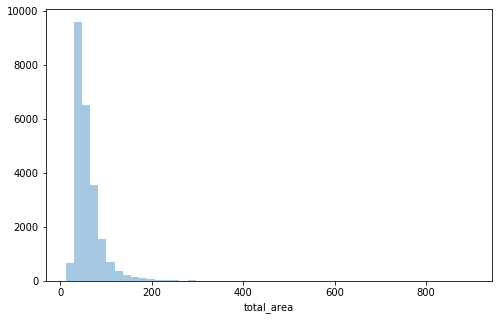

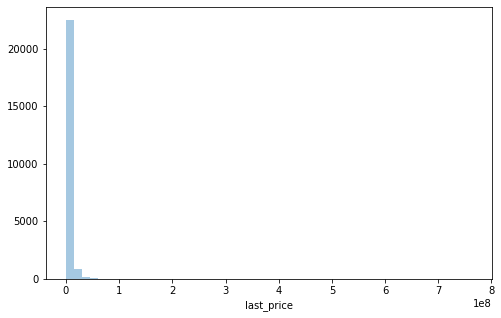

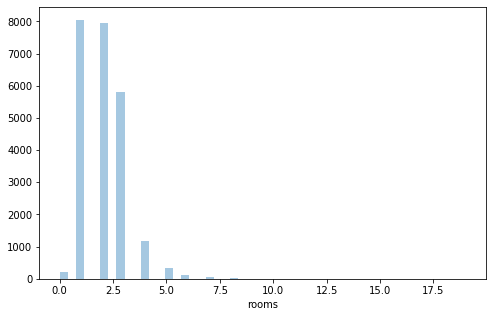

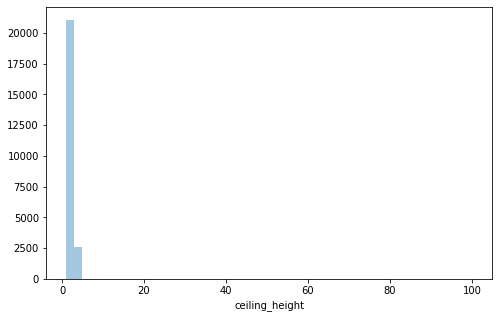

In [28]:
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in columns_list:
    sns.distplot(data[column], kde=False);
    plt.show()

Гистрограммы выглядят странно - пики на нулях, очень сильные разбросы данных. Рассмотрим их по отдельности.

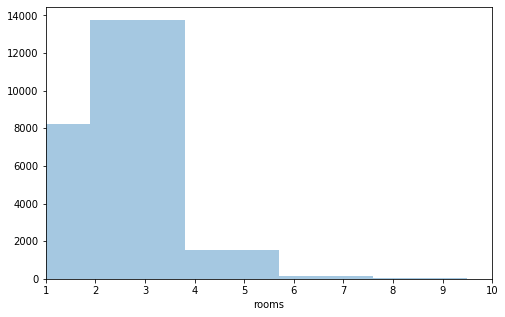

In [29]:
sns.distplot(data['rooms'], kde=False, bins=10);
plt.xlim(1, 10);

Основной пик приходится на 2-3-комнатные квартиры. При этом есть отдельные квартиры с 6 и более комнатами. Построим boxplot, чтобы определить выбросы. 

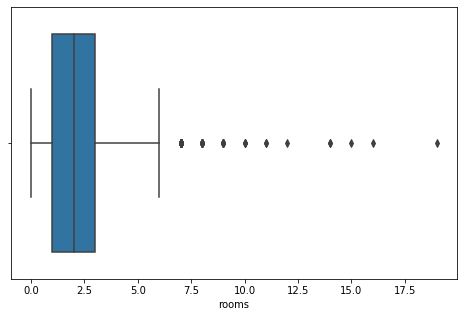

In [30]:
sns.boxplot(x=data['rooms']);

Теперь мы видим, что у нас есть отдельные квартиры с 19 комнатами. Это что-то странное. Не будем учитывать такие квартиры при анализе. Отбросим все значения больше 6 комнат - оставим квартиры, которые приблизительно вписываются в рамки стандартных. Также отбросим значения, равные 0. В квартире не может быть 0 комнат. Построим гистограмму для среза данных. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Да уж, красиво жить не запретишь))
<br>
</font>

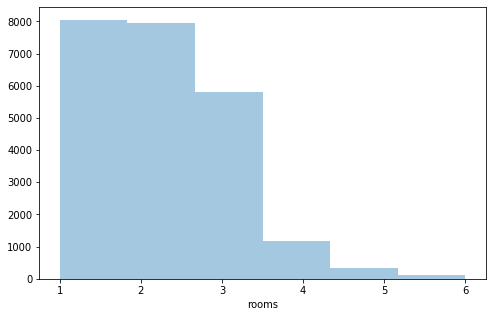

In [31]:
rooms_query = data.query('0 < rooms <= 6')
sns.distplot(rooms_query['rooms'], kde=False, bins=6);

Теперь распределение выглядит правдоподобно. Проанализируем столбец total_area по тому же принципу. 

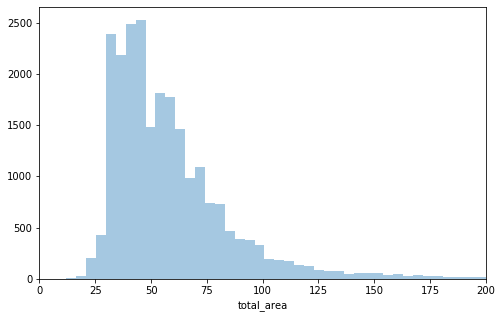

In [32]:
sns.distplot(data['total_area'], kde=False, bins=200);
plt.xlim(0, 200);

Распределение похоже на распределение Пуассона. У нас есть пик на малых значениях и длинный хвост на больших. Можно предположить, что маленькие квартиры в Питере продают чаще. 
<br><br>
Построим boxplot для поиска выбросов. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'>
Можно проанализировать ещё, как подозрение на бимодальность (двугорбость, трёгорбость)<br>
Это когда в одной выборке есть 2 или 3... однородные выборки.<br>
Здесь мы можем наблюдать, скорее всего, именно (подтверждая Ваш прошлый вывод про однушки, двушки...)<br>
как раз три разные группы квартир. Ну это и логично......
<br>
</font>

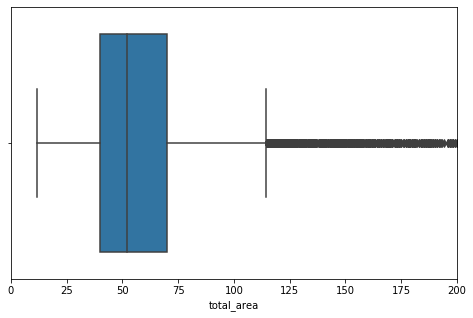

In [33]:
sns.boxplot(x=data['total_area']);
plt.xlim(0, 200);

К счастью, у нас нет значений площади, равных нулю. Правый ус нашего ящика заканчивается на значении примерно в 115-120 квадратных метров. Значения выше еще нельзя назвать аномальными. Выведем зависимость площади от количества комнат - может быть, все значения свыше 120 метров относятся к квартирам с количеством комнат больше 6? Или некоторые из них относятся к нашим 6-комнатным квартирам? 

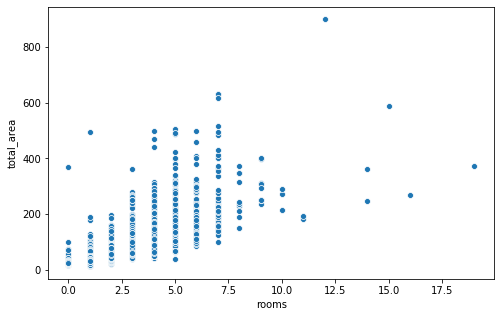

In [34]:
sns.scatterplot(x='rooms', y='total_area', data=data);

Из графика видно, что для квартир с 3 и более комнатами значения площади выше 200 еще не являются выбросами. А вот значения свыше 400 уже смело можно отбрасывать. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'>
Примерно так по жизни и есть. Однако про выбросы - лучше всё-таки не из этого графика делать заключения))))<br>
Тут ящик с усами (боксплот) больше в помощь.<br>
Здесь же напомню рекомендацию из начала исследования: иногда, саммарно выбросы могут образовывать свой особый кластер<br>
который также может быть интересным в плане доп.исследования)))
<br>
</font>

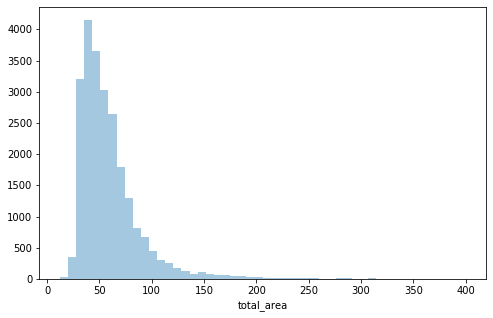

In [35]:
total_area_query = data.query('total_area <= 400')
sns.distplot(total_area_query['total_area'], kde=False);

Теперь распределение выглядит ожидаемо. Мы отбросили отдельные выделяющиеся значения, при этом не удалили ничего важного. Осталось проанализировать высоту потолков и цену квартир. Возьмемся за ceiling_height. 

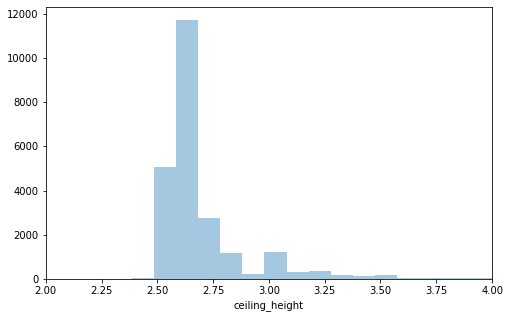

In [36]:
sns.distplot(data['ceiling_height'], kde=False, bins=1000);
plt.xlim(2, 4);

На графике видно, что основной пик по высоте потолков приходится на 2.60. Построим график boxplot для поиска выбросов. 

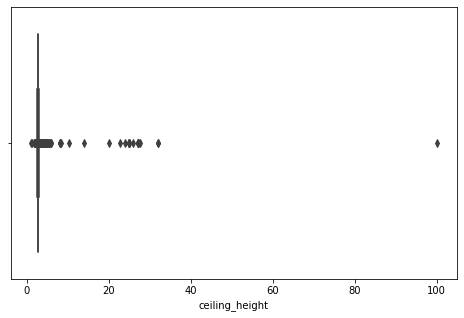

In [37]:
sns.boxplot(data['ceiling_height']);

При таком масштабе ничего не понятно, кроме того, что у нас есть квартира со стометровыми потолками. Ограничим график значениями до 4 по оси x, чтобы получше рассмотреть наш ящик. 

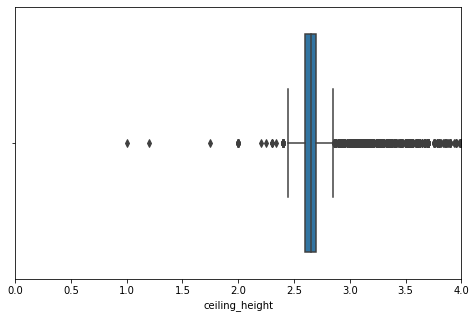

In [38]:
sns.boxplot(data['ceiling_height']);
plt.xlim(0, 4);

Интересно, что у нас есть отдельные квартиры с потолками меньше 2 метров. Вероятно, там живут Хоббиты, - обычный человек там не поместится. Ограничим нашу выборку концом левого уса, а справа оставим значения до 3,5 метров - квартир с высотой потолков под 3 метра у нас почти 2000, это слишком много для того, чтобы просто их отбросить. Тем более, значение кажется нормальным - такие потолки действительно могут быть. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
для Хоббитов будем строить другу модель))<br>
Конечно может быть, я сам из Питера. Могу подтвердить)))
<br>
</font>

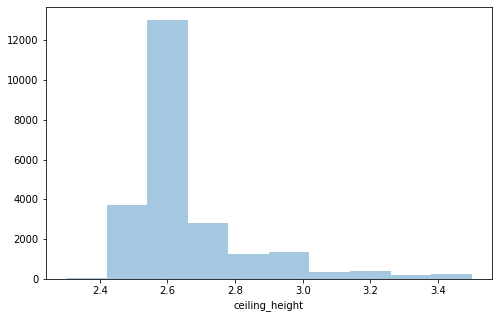

In [39]:
ceiling_height_query = data.query('2.3 <= ceiling_height <= 3.5')
sns.distplot(ceiling_height_query['ceiling_height'], kde=False, bins=10);

Распределение высоты потолков тоже похоже на распределение Пуассона. Чаще всего в квартирах потолки 2.5-2.7 метра. Перейдем к анализу цен на квартиры. 

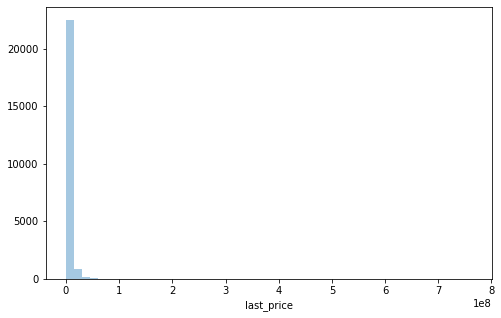

In [40]:
sns.distplot(data['last_price'], kde=False);

У нас очень странный пик около нуля. Неужели, квартиры бесплатные? Посмотрим на сводку по значениям этого столбца. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
бежим туда, там бесплатные квартиры))))))
<br>
</font>

In [41]:
print(data['last_price'].describe())

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Оценивать значения в таком формате очень тяжело. Теперь понятно, что у нас, как минимум, слишком большие значения в этом столбце. Правильно, квартиры ведь стоят миллионы. Разделим значения на 1 000 000 и оставим два знака после запятой - этого будет достаточно для понимания. 

In [42]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'] = data['last_price'].round(2)
print(data['last_price'].describe())

count    23699.000000
mean         6.541597
std         10.887011
min          0.010000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


Теперь значения стали понятнее. Стандартное отклонение, равное 10 - это очень странно. На него, скорее всего, влияют странные максимальные и минимальные значения - квартира за 763 миллиона и за 10 тысяч. Нарисуем boxplot, чтобы найти и удалить выбросы. Сразу ограничим значения, чтобы лучше видеть наш ящик. 

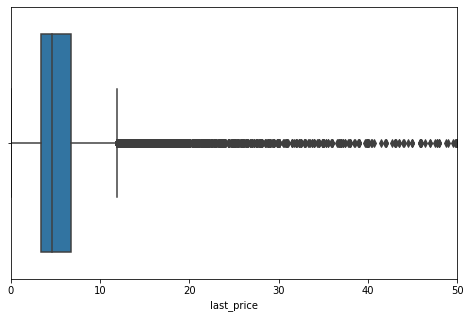

In [43]:
sns.boxplot(data['last_price']);
plt.xlim(0, 50);

Разброс усов идет от 0 до ~11. Отбрасывать значения выше 11 - неправильно, потому что тогда мы отбросим все дорогие квартиры. Ограничим значения нашей выборки 1 и 30 миллионами. Посмотрим, как изменилась структура данных. 

In [44]:
last_price_query = data.query('1 <= last_price <= 30')
print(last_price_query['last_price'].describe())

count    23161.000000
mean         5.790881
std          4.030794
min          1.000000
25%          3.450000
50%          4.600000
75%          6.700000
max         30.000000
Name: last_price, dtype: float64


Проверим, как изменилась наша гистограмма. 

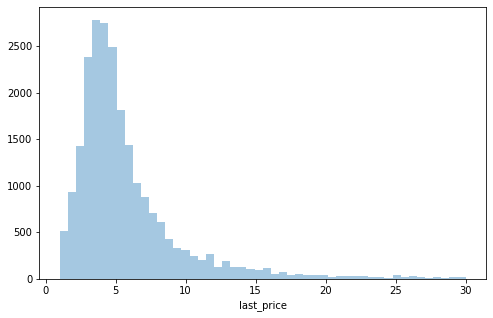

In [45]:
sns.distplot(last_price_query['last_price'], kde=False);

Выглядит гораздо лучше! Отдельно проанализируем столбец с ценой за квадратный метр. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Графика - это сила))
<br>
</font>

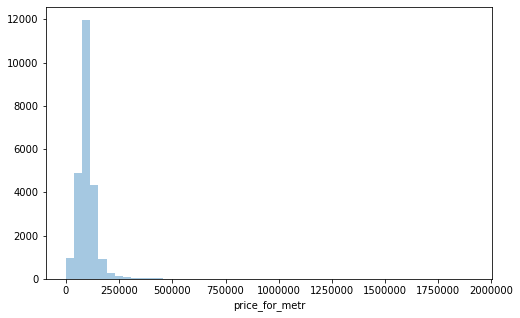

In [46]:
sns.distplot(data['price_for_metr'], kde=False);

Мы видим приближенные к нулю значения и большой разброс значений. Построим boxplot для наилучшей оценки структуры. 

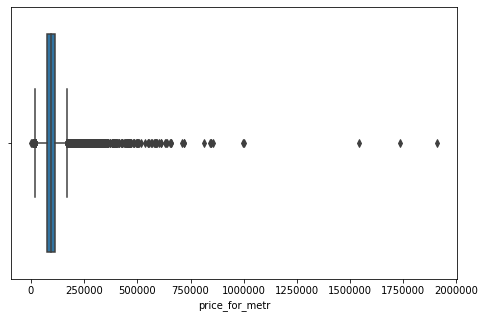

In [47]:
sns.boxplot(data['price_for_metr']);

Видно, что у нас есть некоторые выбивающиеся значения со стоимостью около 2 миллионов за квадратный метр. Это очень много и странно. Приблизим наш ящик, чтобы понять, где можно отсекать значения. 

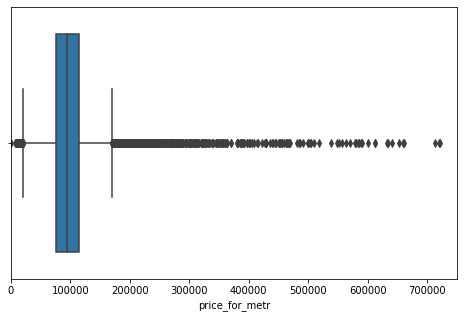

In [48]:
sns.boxplot(data['price_for_metr']);
plt.xlim(0, 750000);

Отсеим значения выше 700000 за квадратный метр и значения за пределами левого уса. 

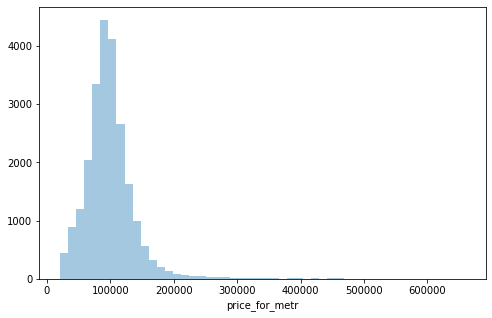

In [49]:
price_for_metr_query = data.query('20000 < price_for_metr < 700000')
sns.distplot(price_for_metr_query['price_for_metr'], kde=False);

Выглядит гораздо лучше. Теперь создадим срез с фильтрацией по всем параметрам из анализа выше. Сохраним новую таблицу без явных выбросов в good_data.

In [50]:
good_data = data.query('(0 < rooms <= 6) and (total_area <= 400) and (2.3 <= ceiling_height <= 3.5) and (1 <= last_price <= 30) and (20000 < price_for_metr < 700000)')
print(good_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22603 entries, 0 to 23698
Data columns (total 29 columns):
total_images            22603 non-null int64
last_price              22603 non-null float64
total_area              22603 non-null float64
first_day_exposition    22603 non-null datetime64[ns]
rooms                   22603 non-null int64
ceiling_height          22603 non-null float64
floors_total            22603 non-null int64
living_area             22603 non-null float64
floor                   22603 non-null int64
is_apartment            22603 non-null bool
studio                  22603 non-null bool
open_plan               22603 non-null bool
kitchen_area            22603 non-null float64
balcony                 22603 non-null int64
locality_name           22556 non-null object
airports_nearest        22603 non-null int64
city_centers_nearest    22603 non-null int64
parks_around3000        22603 non-null int64
parks_nearest           22603 non-null int64
ponds_around3000   

Мы потеряли данные примерно по 1000 квартир - это около 4% данных, что вполне нормально для очистки данных от выбросов. Выведем гистограммы по всем анализируемым выше столбцам и посмотрим на результат. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Согласен, Вы достаточно ловко справились с выбросами)
<br>
</font>

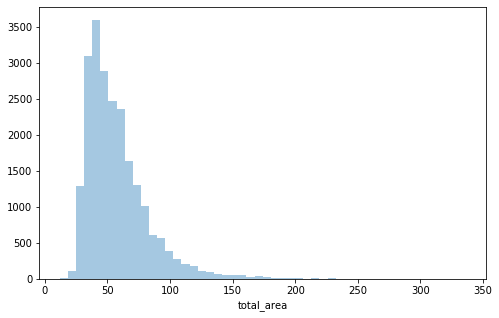

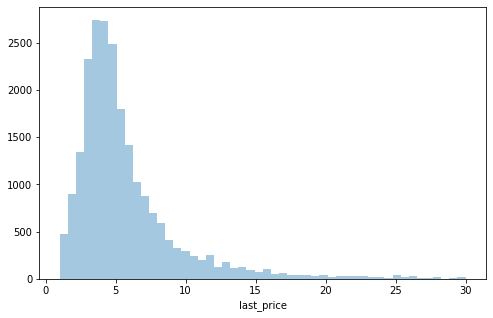

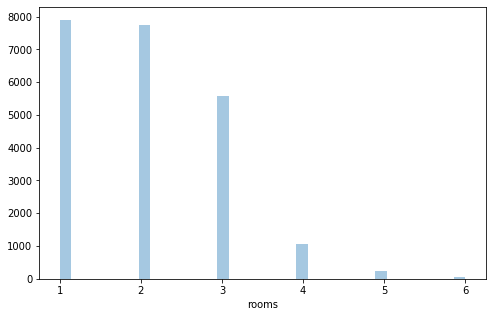

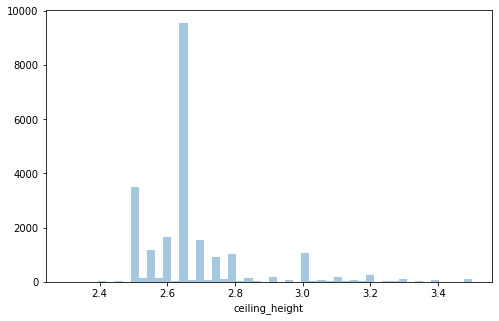

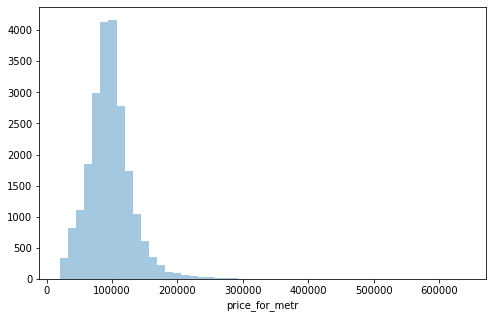

In [51]:
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'price_for_metr']
for column in columns_list:
    sns.distplot(good_data[column], kde=False);
    plt.show()

### Вывод

Теперь все графики выглядят реалистично. В основном графики имеют распределение Пуассона. На рынке значительно больше однокомнатных и двухкомнатных квартир с маленькой площадью и по не очень высокой цене. Большинство потолков в Питере имеют стандартную высоту - 2.6 метра. 
Перейдем к изучению времени продажи квартиры. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
поддерживая основные результаты)
<br>
</font>

### Анализ времени продажи квартиры

Изучим, как долго обычно продается квартира. Построим гистограмму и посмотрим на распределение. 

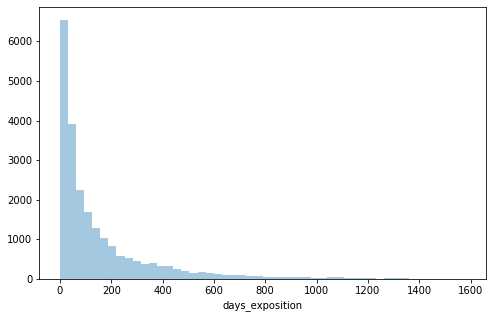

In [52]:
sns.distplot(good_data['days_exposition'], kde=False);

Распределение (Пуассона) соответствует ожидаемому распределению. Большинство квартир продаются в первые полгода. Но некоторым везет меньше. Есть странный пик около нуля. Приблизим график, чтобы посмотреть, к какому числовому диапазону действительно относятся эти значения. 

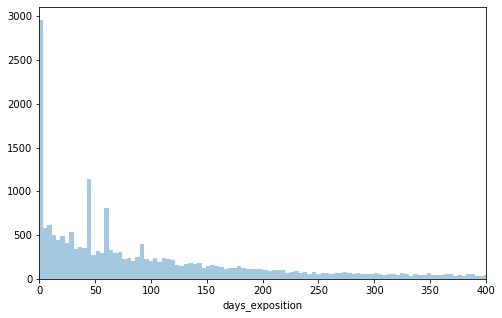

In [53]:
sns.distplot(good_data['days_exposition'], kde=False, bins=400);
plt.xlim(0, 400);

Это действительно значения, очень близкие к нулю. Либо квартиры продаются очень быстро, либо люди просто снимают объявления. Отбросим значения, равные -1, которыми мы заполняли пропуски в столбце. Построим гистограмму заново. 

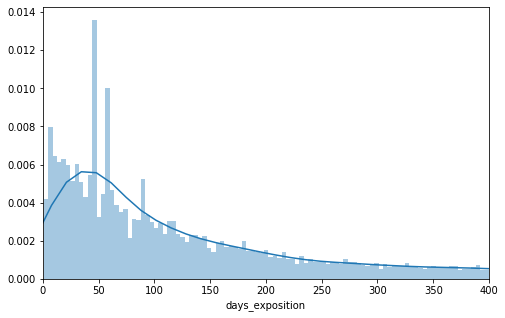

In [54]:
days_exposition_query = good_data.query('days_exposition >= 0')
sns.distplot(days_exposition_query['days_exposition'], bins=400);
plt.xlim(0, 400);

График стал выглядеть гораздо лучше. Но у нас все еще много очень маленьких значений. Квартиры вряд ли были проданы за несколько дней. Можно предположить, что после того, как пользователь выкладывает объявление, ему звонят риелторы, которые берут заботы о продаже квартиры на себя. И тогда пользователь снимает свое объявление с сайта. Но это лишь догадки. Эту информацию необходимо передать. 
<br><br>
Посмотрим на структуру данных и построим boxplot, чтобы посмотреть на типичные и нетипичные значения. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Ну или, как вариант, сама игра риэлтеров. Нужно чтобы объявление появилось в каком-либо источнике....
<br>
</font>

count    19649.000000
mean       179.716678
std        218.482129
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


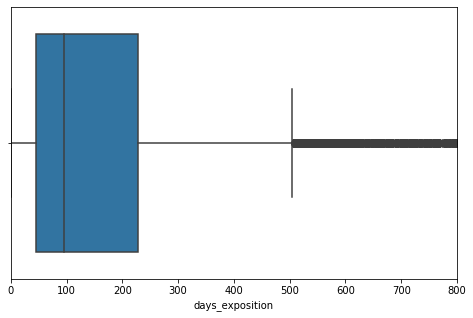

In [55]:
print(days_exposition_query['days_exposition'].describe())
sns.boxplot(days_exposition_query['days_exposition']);
plt.xlim(0, 800);

Среднее и медианное значения отличаются друг от друга аж в два раза - слишком затяжные продажи очень сильно влияют на структуру данных. Не будем удалять эти значения, но будем иметь в виду, что они у нас есть. 

### Вывод

Из распределения данных видно, что больше 75% квартир продаются меньше, чем за год (в течение 8 месяцев). А чаще всего квартира продается в течение 3 месяцев. Если квартира продается больше, чем 8 месяцев, это уже можно считать долгим, а больше 500 дней (1 год и 4 месяца) - критично долгим. При этом быстрой продажей можно назвать продажу, осуществленную менее, чем за 45 дней. Таких квартир всего 25%.
<br><br>
Важно обратить внимание, почему большое количество объявлений снимается в течение нескольких дней. Есть ли этому какое-то логическое объяснение или есть какие-то проблемы с сайтом. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Да, всё так)<br>
А то, что много однодневок - это хорошая находка)
</font>

### Анализ влияния различных факторов на стоимость квартиры

Для определения зависимости цены от различных факторов мы будем использовать коэффициент корреляции Пирсона. Для корректной оценки значение цены будем брать за квадратный метр. 

Корреляция с total_area 0.1358621296469648


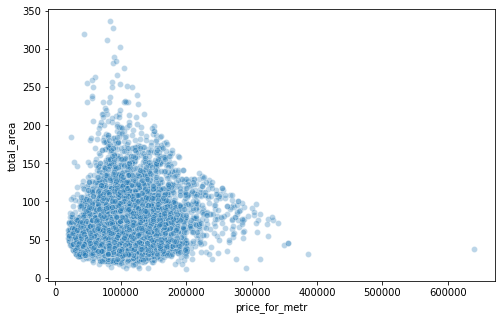

Корреляция с rooms -0.07995338703974252


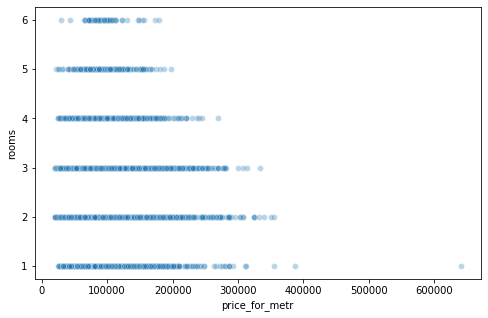

Корреляция с city_centers_nearest 0.09006808938748327


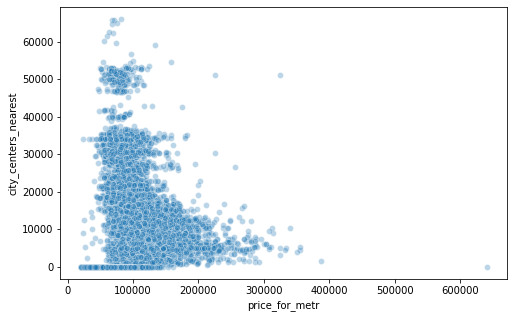

Корреляция с floor_type 0.043525165420873334


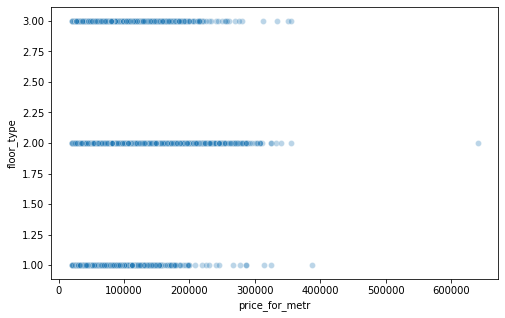

In [56]:
columns_for_corr = ['total_area', 'rooms', 'city_centers_nearest', 'floor_type']
for column in columns_for_corr:
    print('Корреляция с', column, good_data['price_for_metr'].corr(good_data[column]))
    sns.scatterplot(x='price_for_metr', y=column, data=good_data, alpha=0.3);
    plt.show()

Из графиков и коэффициентов выше видно, что:
<ul>
    <li>Корреляция с общей площадью - есть, но, судя по коэффициенту, небольшая. Для квартир с площадью до 100 квадратных метров наблюдается тендеция удорожания при росте площади, а с площадью больше 100 квадратных метров наоборот - чем больше площадь, тем дешевле метр. Но основная масса значения расположена в одной зоне.</li>
    <li>C количеством комнат наблюдается похожая, но уже более явная тенденция. Цена в двухкомнатных квартирах выше, чем в однокомнатных, и далее с повышением количества комнат цена за метр заметно падает. </li>
    <li>Самая явная зависимость наблюдается с расстоянием от центра - чем дальше квартира, тем ниже цена за метр. В целом, это ожидаемо. Квартиры в центре всегда стоили дороже, чем на окраине. Но есть и отдельные выбросы, правда, очень редкие. </li>
    <li>Квартиры на первом и последнем этажах, в целом, дешевле, чем на остальных. Но коэффициент корреляции не очень большой. Причем гораздо заметнее более дешевая цена квадратного метра для квартир, расположенных на первом этаже. Видимо, люди не любят, когда к ним в окна может заглянуть любой прохожий. Это объясняет моду на новостройки, у которых на первом этаже расположены торговые площади. </li>
</ul>

Изучим зависимость цены квартиры от времени выставления объявления. 

Корреляция с weekday -0.012235144580627041


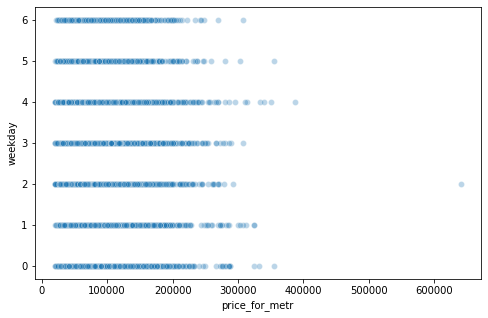

Корреляция с month -0.005384986122868852


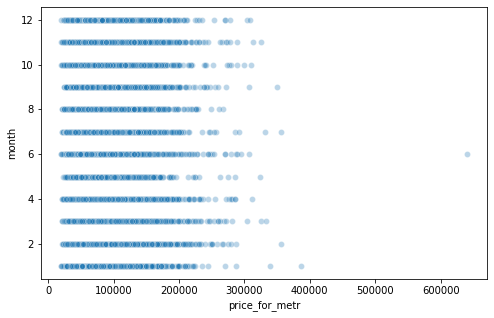

Корреляция с year 0.052353844923389854


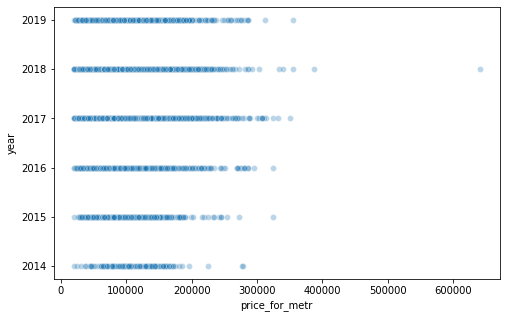

In [57]:
columns_for_corr = ['weekday', 'month', 'year']
for column in columns_for_corr:
    print('Корреляция с', column, good_data['price_for_metr'].corr(good_data[column]))
    sns.scatterplot(x='price_for_metr', y=column, data=good_data, alpha=0.3);
    plt.show()

Зависимости от дня недели или месяца не наблюдается (хотя заметно, что в мае на продажу выставляют квартиры с чуть более низкой ценой за метр), зато наблюдается зависимость от года. До 2017 года квартиры дорожали, а потом немного подешевели. 

### Вывод

Наибольшая зависимость цены наблюдается от расстояния от центра. Почти в 3 раза выгоднее купить квартиру на окраине и не двухкомнатную - на них самые высокие цены. Также наблюдается зависимость от года выставления объявления. В 2017 году цены за квадратный метр были самые высокие. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Корреляция - интересный и хороший инструмент))<br><br><font color='red'>
На обсуждение:<br>
Для того, чтобы более достоверно использовать этот интсрумент, нужно ещё помнить такие моменты<br>
0) Этот инструмент только для количественных шкал!!! Т.е. когда и один и другой столбец представлен в виде чисел<br>
Причём числа - типа типа количества комнат во многих случаях может подходить под номинальную шкалу<br>
и тогда коэффициент корреляции не сможет показать что-либо интересное.<br>
Это Вы видите, как раз, на одном из графиков)))<br><br>
1) Наряду с силой связи, есть ещё характертеристика уровня значимости. Т.е. на сколько выявленной связи можно доверять (это теория р-уровня значений. Ещё будете изучать. Советую (если не очень пока знаете что это) попытать наставника по этому вопросу <br>
В общем-то важная тема<br><br>
2) Вы уже чётко видите разницу между средним и медианой (опираюсь на Ваш проект)<br>
Потому знаете, что данные имеют склонность быть нормальными и ненормальными (вот ёлки, всё как у людей:)))<br>
Этот факт важен при использовании расчётов коэффициента корреляции:<br>
Если данные нормальные - используют критерий Пирсона. если ненормальный - критерий Спирмена)                                                                  
<br>
</font>

### Анализ населенных пунктов

Проведем анализ населенных пунктов. Выясним, где продается больше всего квартир, и в каких из них квартиру можно купить дешевле. Создадим сводную таблицу. Сначала отсортируем ее по количеству объявлений по районам, оставим только верхние 10 строк, а потом отсортируем по средней цене за метр. 

In [58]:
locality_pivot = good_data.pivot_table(index='locality_name', values='price_for_metr', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count_locality', 'mean_price']
locality_pivot['mean_price'] = locality_pivot['mean_price'].astype('int')
locality_pivot = locality_pivot.sort_values(by='count_locality', ascending=False).head(10).sort_values(by='mean_price', ascending=False)
print(locality_pivot)

                 count_locality  mean_price
locality_name                              
Санкт-Петербург           15017      110142
Пушкин                      362      102607
Кудрово                     450       95151
Парголово                   322       90448
Мурино                      561       85478
Шушары                      435       78382
Колпино                     337       75332
Гатчина                     302       69363
Всеволожск                  388       68645
Выборг                      226       58805


### Вывод 

Больше всего квартир в самом Санкт-Петербурге. В нем же самые дорогие квартиры. А вот самые дешевые квартиры в Выборге. Это не удивительно. Из нашего списка Выборг находится дальше всего от Питера, остальные населенные пункты либо прилегают к Питеру, либо находятся совсем недалеко от него. 

### Определение центра 

Определим центр Питера для анализа квартир в центральном районе. Создадим таблицу, в которую войдут только квартиры с locality_name == 'Санкт-Петербург'.

In [59]:
spb = good_data[good_data['locality_name'] == 'Санкт-Петербург']

Добавим столбец с расстоянием до центра в километрах. Для этого разделим столбец city_centers_nearest на 1000 и округлим до целых значений. Так же добавим столбец с ценой за километр. 

In [60]:
spb.loc[:, 'city_centers_km'] = spb.loc[:, 'city_centers_nearest'] / 1000
spb.loc[:, 'city_centers_km'] = spb.loc[:, 'city_centers_km'].astype('int')
print(spb)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20       13.00      108.00           2019-03-07      3   
2                10        5.20       56.00           2015-08-20      2   
4                 2       10.00      100.00           2018-06-19      2   
7                 5        7.92       71.60           2019-04-18      2   
9                18        5.40       61.00           2017-02-26      3   
...             ...         ...         ...                  ...    ...   
23688            19        9.20      101.00           2019-04-01      3   
23689            13        3.55       35.30           2018-02-28      1   
23690             3        5.50       52.00           2018-07-19      2   
23691            11        9.47       72.90           2016-10-13      2   
23697            13       11.48       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Сгруппируем данные и построим гистограмму для определения центра. 

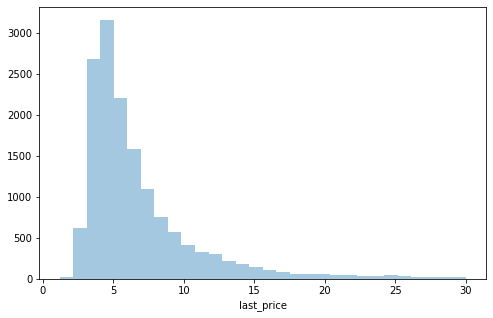

In [61]:
spb_pivot = spb.pivot_table(index='city_centers_km', values='last_price')
sns.distplot(spb['last_price'], kde=False, bins=30);

На графике выше видно резкое падение цены после 5 километров. Соответственно, центральную зону можно определить радиусом в 5 километров. 

### Вывод

На основании анализа зависимости стоимости квартир от расстояния до центра города, мы выявили центральную зону, которая занимает собой пространство в радиусе 5 километров от центра. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
5-8 км - ОК . вообще, эта цифра плавающая. Понятно, что чёткой границы нет.<br> 
 Можно только предположить. Метод Вы избрали верно. <br>
Исходя из данных центр можно вычислить как 5-8 км)<br>
То, что предлагаете Вы, можно также приянть верным)
<br>
</font>

### Анализ квартир в центре 

Проанализируем квартиры в центре. Выделим из good_data квартиры с расстоянием до центра города не более 5 километров. 

In [62]:
spb_center = spb.query('city_centers_nearest <= 5000')

Изучим параметры площади, цены, числа комнат и высоты потолков в этом районе. Выведем гистограммы для анализа. Для сравнения с данными по всему городу будем выводить такие же графики. Для этого используем созданную ранее таблицу spb.  

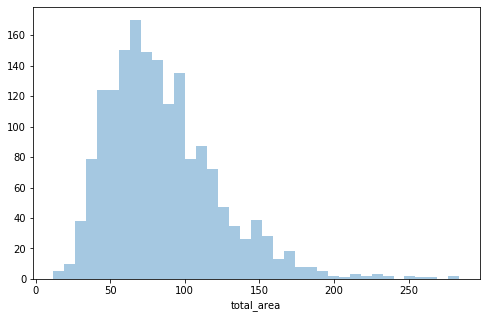

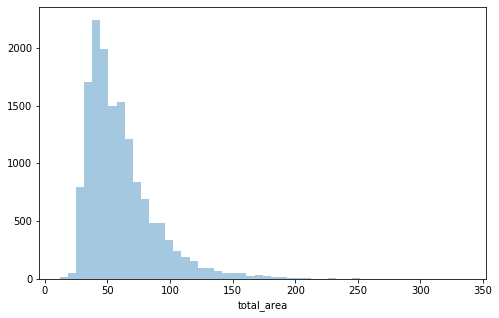

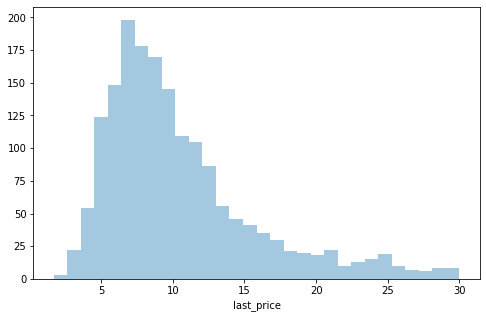

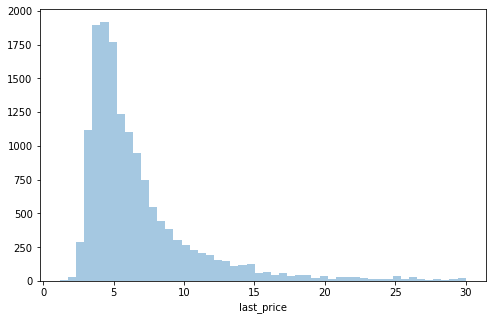

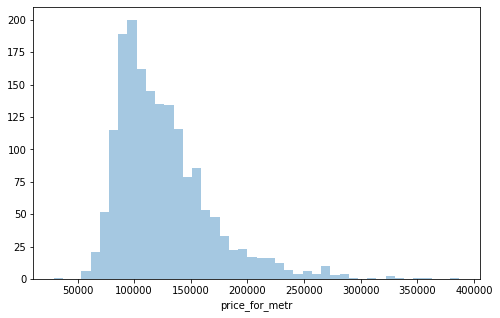

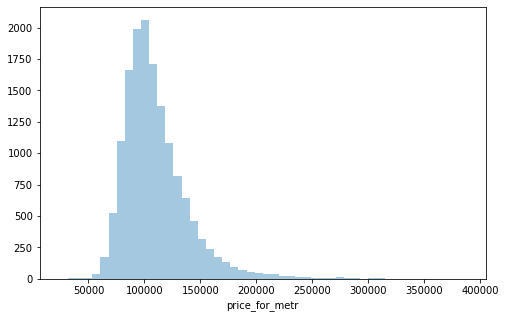

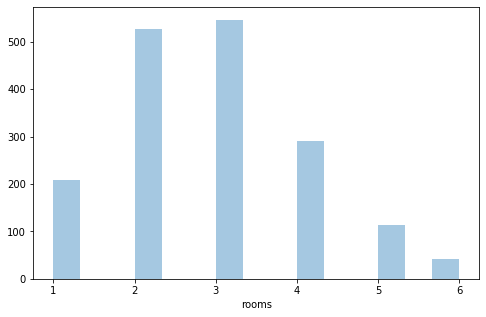

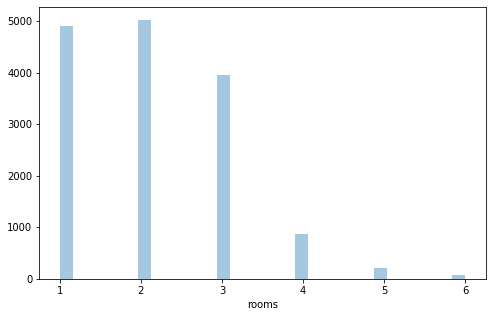

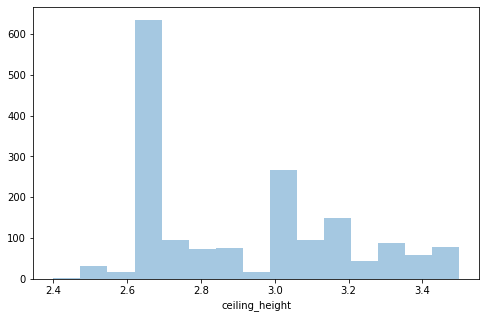

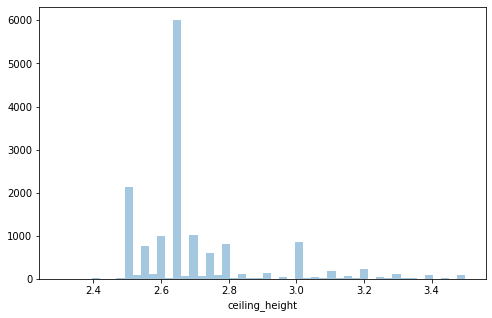

In [63]:
columns_for_center = ['total_area', 'last_price', 'price_for_metr', 'rooms', 'ceiling_height']
for column in columns_for_center: 
    sns.distplot(spb_center[column], kde=False);
    plt.show();
    sns.distplot(spb[column], kde=False);
    plt.show();

Из графиков выше видно, что:
<ul>
    <li>Квартиры в центре чаще больше по площади, чем кватиры во всем городе. Пик площади квартиры наблюдается в районе 75 метров против 40 метров во всем Питере. Почти в два раза больше!</li>
    <li>Цена так же заметно выше. Наиболее часто встречаются квартиры с ценой около 7 миллионов против 4-5 миллионов по всему Питеру. При этом цена за метр хоть и выше, но пик по ценам за метр примерно одинаковый и в центре, и за пределами центра - около 100000 рублей. Значит, заметно более высокие цены на квартиры связаны не только с ценой за метр, но и с большей средней площадью квартиры. </li>
    <li>Интересная тенденция есть по количеству комнат. В центре выставлено на продажу очень мало однокомнатных квартир, хотя во всем остальном городе они очень популярны. И значительно больше четырехкомнатных. Их даже больше, чем однокомнатных. Скорее всего, это связано со старой застройкой.</li>
    <li>Вероятно, время застройки повлияло не только на количество комнат, но и на высоту потолков. В центре гораздо чаще встречаются квартиры с трехметровыми потолками. И даже потолки с высотой 3.5 метра уже не так редки, как во всем городе. </li>
</ul>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
потолки 3 метра<br>
Дааа, сталинский ампир - популярная тема в Питере)
<br>
</font>

Проанализируем зависимость цены от числа комнат, этажа, удаленности от центра и даты размещения объявления. Для корректности данных будем брать цену за квадратный метр. Сравнивать будем с данными по всему Питеру. 

В центре корреляция цены с rooms -0.32613170417683185
В городе корреляция цены с rooms -0.14158626193809748


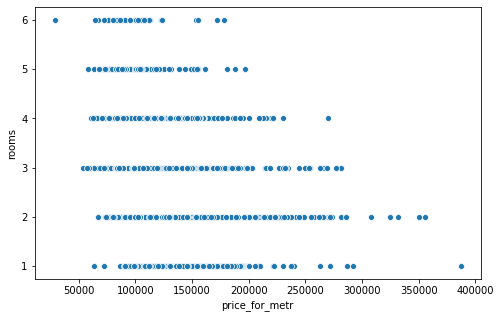

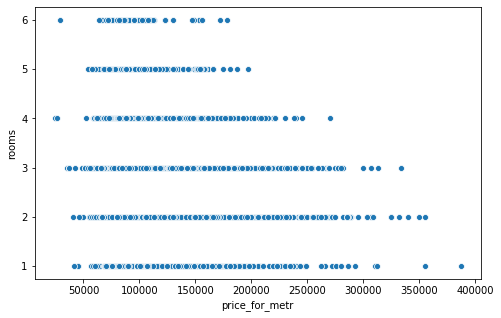

В центре корреляция цены с floor_type 0.02374152048713975
В городе корреляция цены с floor_type 0.07029352243616067


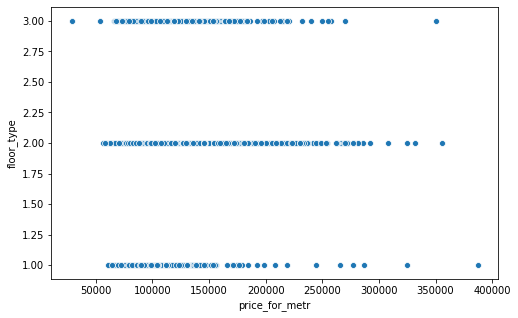

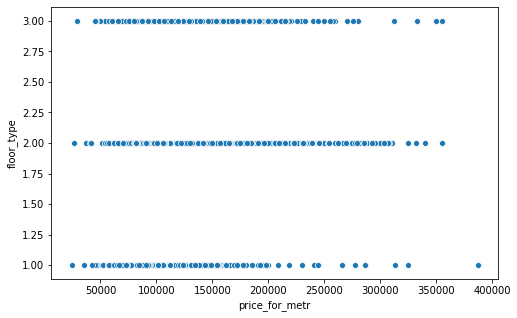

В центре корреляция цены с city_centers_nearest 0.04656668548025192
В городе корреляция цены с city_centers_nearest -0.3379048087039513


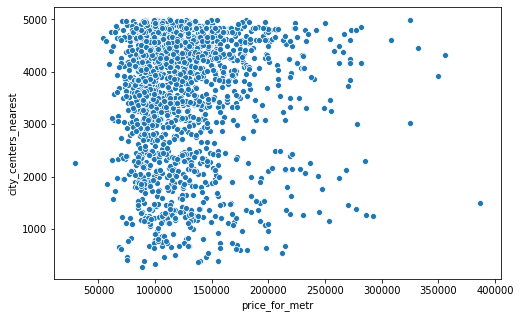

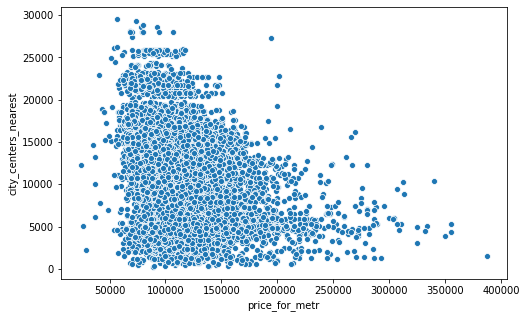

В центре корреляция цены с weekday -7.793766383477317e-05
В городе корреляция цены с weekday -0.006656583459554734


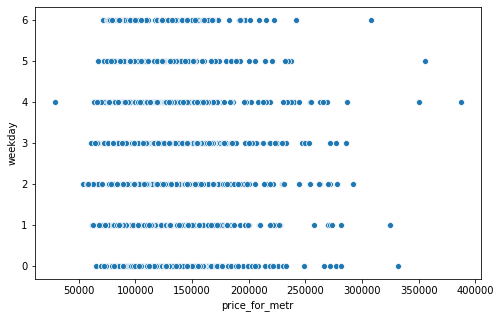

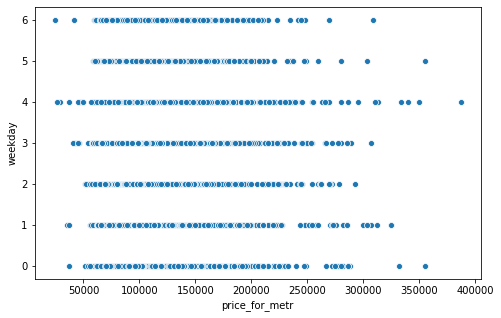

В центре корреляция цены с month -0.014695902771014832
В городе корреляция цены с month -0.020490426352662683


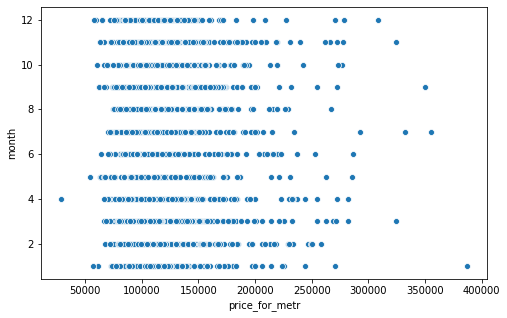

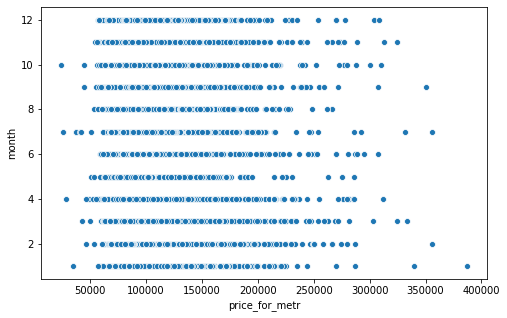

В центре корреляция цены с year 0.09514876561904313
В городе корреляция цены с year 0.09521566369268396


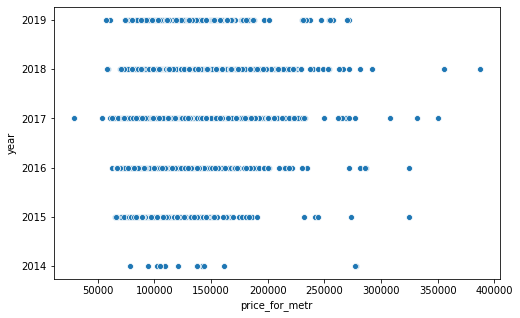

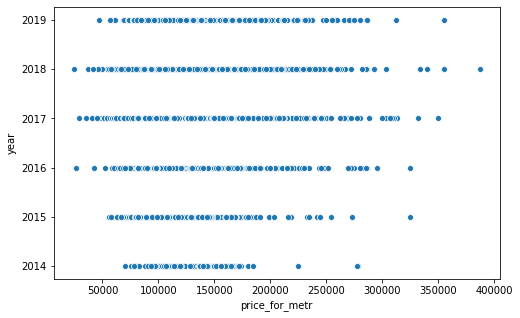

In [64]:
columns_corr_spb = ['rooms', 'floor_type', 'city_centers_nearest', 'weekday', 'month', 'year']
for column in columns_corr_spb:
    print('В центре корреляция цены с', column, spb_center['price_for_metr'].corr(spb_center[column]))
    print('В городе корреляция цены с', column, spb['price_for_metr'].corr(spb[column]))
    sns.scatterplot(x='price_for_metr', y=column, data=spb_center);
    plt.show()
    sns.scatterplot(x='price_for_metr', y=column, data=spb);
    plt.show()

<ul>
    <li>В центре коэффициент корреляции цены с количеством комнат в два раза выше, чем во всем городе, но общая тенденция сохраняется. Цена за метр в двухкомнатных квартирах по-прежнему самая высокая.</li>
    <li>Корреляции цены с этажом в центре в 3 раза меньше, чем во всем городе.</li>
    <li>Очень интересная ситуация с корреляцией цены с удаленностью от центра. В центре корреляция положительная, а это значит, что квартиры дорожают с удалением от центра, а во всем городе отрицательная - то есть с удалением квартиры дешевеют. Возможно, это связано с тем, что в самом ближайшем центре продается меньше квартир?</li>
    <li>С днями недели ситуация не изменилась - зависимости по-прежнему нет, как и с месяцем.</li>
    <li>А вот с годом интересно - пока во всем городе в 2018 цены уже начинали чуть падать, в центре еще продолжали расти. Коэффииент корреляции остался прежним.</li>
</ul>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'>
Как и писал про корреляцию выше, ею надо пользоваться осторожно)))<br>
Чтобы гоорить о сравнении цен между однушками, двушками.... шестерушками (это можно расценивать как номинальная шкала с 6-ю уровнями)<br>
Лучше использовать инструмент "сравнение групп (из темы проверка гипотез)"( будет чуть позже)<br>
Обратите внимание на эту технику. Т.к. она адекватнее сможет ответить на вопрос о разнице цены между количесвтом комнат.

<br>
</font>

### Вывод

<ul>
    <li>Квартиры в центре больше по площади. </li>
    <li>При не сильных отличиях в цене за метр, квартиры в центре дороже. Возможно, потому что они просто больше по площади.</li>
    <li>В центре очень мало однокомнатных квартир и значительно больше четырехкомнатных.</li>
    <li>В квартирах в центре потолки выше (встречаются даже с высотой 3.5 метра).</li>
    <li>В центре цена за метр в два раза больше зависит от количества комнат, чем во всем городе.</li>
    <li>А вот от этажа цена за метр в центре зависит меньше. </li>
    <li>Квартиры на небольшом удалении от центра, но еще в центральной зоне, дороже, чем квартиры, находящиеся совсем в центре.</li>
    <li>Квартиры в центре, в отличие от всего города, начали падать в цене в 2019, а не в 2018 году. </li>
    <li>Цена не зависит от дня недели или месяца публикации объявления.</li>
</ul>

# Шаг 5. Общий вывод

Мы проанализировали данные из объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области. Самые дорогие квартиры, конечно, находятся в Санкт-Петербурге. И особенно - в центральной зоне. 
<br><br>
Центральной зоной мы называем радиус 5 километров от центра. Там у квартир больше площадь, выше потолки, и чаще встречаются многокомнтные квартиры, а вот однокомнатных значительно меньше, чем в остальной части гороода. Двухкомнатные квартир на продаже больше во всех районах. Наиболее часто встречающаяся высота потолков - 2.6 метра. 
<br><br>
Мы выяснили, что цена на квартиру не зависит от дня недели или месяца выставления объявления. Зато от года к коду цены на квартиры растут. А вот в 2019 году цены немного упали. 
<br><br>
Больше 75% квартир продаются меньше, чем за год (в течение 8 месяцев). А чаще всего квартира продается в течение 3 месяцев. Если квартира продается больше, чем 8 месяцев, это уже можно считать долгим, а больше 500 дней (1 год и 4 месяца) - критично долгим. При этом быстрой продажей можно назвать продажу, осуществленную менее, чем за 45 дней. Таких квартир всего 25%.
<br><br>
Важно обратить внимание, почему большое количество объявлений снимается в течение нескольких дней. Есть ли этому какое-то логическое объяснение или есть какие-то проблемы с сайтом.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
по последнему пункту:<br>
причин может несколько быть:<br>
От, действительно, проблем на сайте.<br>
До банальной перекупки....  а может реэлторские игры...
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Валерия, прекрасная работа!!!<br>
Первичное исследование данных - пропуски, типы данных; графики и построение аналитических таблиц/расётов;<br>
смелость аналитических гипотез; стремление к автоматизации рутины питоновскими инсрументами;<br>
чёткость и логичность выводов - у Вас всё получилось!<br>
Мне было интересно двигаться от блока к блоку. 
<br>
Ощущение такое, как книгу читал. Даже позволял себе комментарии на её полях)<br>
Спасибо Вам за этот труд. В это наше время, Вы нашли время и силы к самосовершенствованию <br>
И сделали тем самым ещё один шаг по дороге "современная аналитика" к цели "мой аналитический успех". И этот шаг более чем уверенный.<br><br>
    
<font color='red'>
В теле проекта, есть несколько моментов, окрашенных в цвет.<br>
Для дальнейшей такой же уверенной работы, будет хорошо, если Вы их ещё раз посмотрите<br><font color='green'>
    
<br> УСПЕХОВ В ДАЛЬНЕЙШЕМ ОБУЧЕНИИ
<br>
</font>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- [x] "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод